# Practical PHDS: Medical Imaging

# DICOM

## Learning Activity 1: Have a look at these websites and see what they provide

Digital Imaging and Communications in Medicine (DICOM) is a standard for handling, storing, printing, and transmitting information in medical imaging.

DICOM Datasets

There’s a wealth of freely available DICOM datasets online but here’s a few that should get you started:

    Osirix Datasets: Large range of human datasets acquired through a variety of imaging modalities.
    http://www.osirix-viewer.com/resources/dicom-image-library/
    
    Visible Human Datasets: Parts of the Visible Human project are somehow freely distributed here.
    https://www.nlm.nih.gov/research/visible/visible_human.html
 
    The Zubal Phantom: This website offers multiple datasets of two human males in CT and MRI.
    http://noodle.med.yale.edu/zubal/

## Learning Activity 2: Have a look at the DICOM information sources and see what DICOM-Viewers are available

DICOM Information Sources

http://www.dclunie.com/medical-image-faq/html/part8.html#DICOMFileConvertorsAndViewers

# --- ONE SLICE ---

# DICOM in Python

The pydicom package consists of pure-python code, is hosted on pypi, and can be easily installed through pip as such:

## How do we use Dicom in Python?

In [1]:
import dicom

In [2]:
#further imports
import sys 
import glob
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.cm as cm

plt.xkcd(scale=.5, length=100, randomness=2)

%matplotlib inline 

# Accessing the image's meta-data

In [3]:
#download the files from moodle and unzip
file_path ='N:\\PHDS8\\Knee\\MR-MONO2-16-knee.dcm'

In [4]:
#reading the dicom file
my_dcm_file = dicom.read_file(file_path)

In [5]:
my_dcm_file.PatientsName #Really? Who would have thought?

'Anonymized'

## You can also set values by name or tag number:

In [6]:
my_dcm_file.PatientID = "12345"

In [7]:
my_dcm_file

(0008, 0000) Group Length                        UL: 414
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.1.2.139348932.2.9.602503126
(0008, 0020) Study Date                          DA: '1989.02.03'
(0008, 0021) Series Date                         DA: '1989.02.03'
(0008, 0023) Content Date                        DA: '1989.02.03'
(0008, 0030) Study Time                          TM: '09:26:18'
(0008, 0031) Series Time                         TM: '09:58:19'
(0008, 0033) Content Time                        TM: '09:58:46'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'
(0008, 0080) Institution Name                    LO: 'THOMAS JEFF UNIVHOSPITAL MRI'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1010) Station Name 

# What if we want to work with an array?

In [8]:
#transfer into an array with grey values
my_dcm_array = my_dcm_file.pixel_array
my_dcm_array

array([[1024, 1024, 1024, ..., 1025, 1024, 1024],
       [1024, 1024, 1024, ..., 1025, 1024, 1024],
       [1031, 1033, 1029, ..., 1040, 1034, 1028],
       ..., 
       [1028, 1027, 1027, ..., 1061, 1025, 1029],
       [1031, 1030, 1030, ..., 1067, 1026, 1030],
       [1024, 1024, 1024, ..., 1026, 1024, 1024]], dtype=int16)

# Visualize 

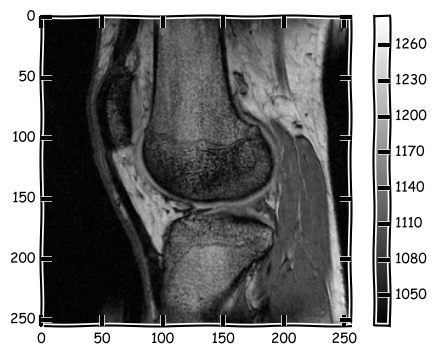

In [9]:
plt.figure(figsize=(6,4))
plt.imshow(my_dcm_array, cmap=plt.cm.gray)
plt.colorbar()

## Histogram of grey values

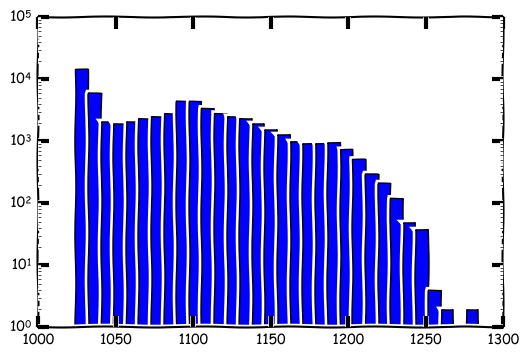

In [10]:
plt.hist(my_dcm_array.ravel(), bins=32, log=True);

# Simple binary image processing

In [11]:
bgmean = my_dcm_array[:,:].mean()
print (bgmean)

1085.70285034


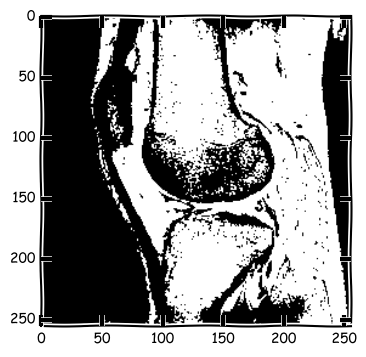

In [12]:
#do some operations
brainmask = my_dcm_array > bgmean

plt.imshow(brainmask, cmap = cm.Greys_r);

## Edge detection with filters

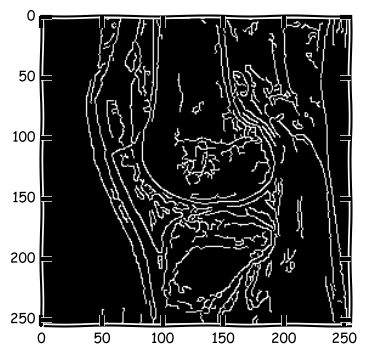

In [13]:
#Edge detection
#from skimage.filters import canny deprecated
from skimage import feature
edges = feature.canny(my_dcm_array/500.)
plt.imshow(edges, cmap = cm.Greys_r)

## Add some random noise

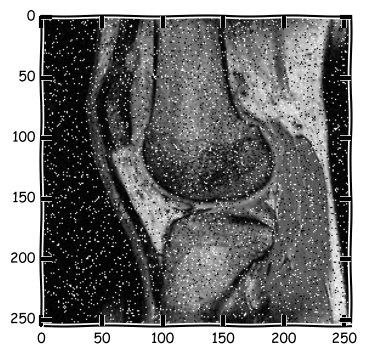

In [14]:
#add some noise

my_dcm_array[np.random.randint(0, my_dcm_array.shape[0], int(0.05 * my_dcm_array.size)), np.random.randint(0, my_dcm_array.shape[1], int(0.05 * my_dcm_array.size))] = my_dcm_array.min()
my_dcm_array[np.random.randint(0, my_dcm_array.shape[0], int(0.05 * my_dcm_array.size)), np.random.randint(0, my_dcm_array.shape[1], int(0.05 * my_dcm_array.size))] = my_dcm_array.max()

plt.imshow(my_dcm_array, cmap = cm.Greys_r);

# Learning Activity 3: Add some more noise

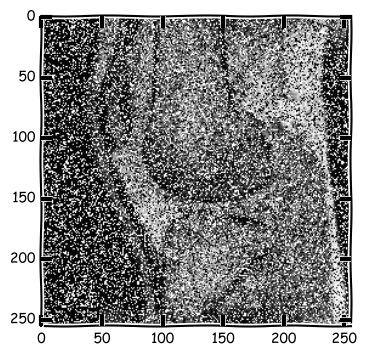

In [15]:
#add some more noise

my_dcm_array[np.random.randint(0, my_dcm_array.shape[0], int(0.25 * my_dcm_array.size)), np.random.randint(0, my_dcm_array.shape[1], int(0.25 * my_dcm_array.size))] = my_dcm_array.min()
my_dcm_array[np.random.randint(0, my_dcm_array.shape[0], int(0.25 * my_dcm_array.size)), np.random.randint(0, my_dcm_array.shape[1], int(0.25 * my_dcm_array.size))] = my_dcm_array.max()

plt.imshow(my_dcm_array, cmap = cm.Greys_r);

# --- MULTIPLE SLICES ---

In [16]:
#importing packages we’ll need:
import dicom
import os
import numpy
from matplotlib import pyplot, cm

we use os.path.walk to traverse the MyHead directory, and collect all .dcm files into a list named lstFilesDCM:

In [17]:
PathDicom = 'N:\\PHDS8\\Head'
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [18]:
#print the files
lstFilesDCM



['N:\\PHDS8\\Head\\MR000000.dcm',
 'N:\\PHDS8\\Head\\MR000001.dcm',
 'N:\\PHDS8\\Head\\MR000002.dcm',
 'N:\\PHDS8\\Head\\MR000003.dcm',
 'N:\\PHDS8\\Head\\MR000004.dcm',
 'N:\\PHDS8\\Head\\MR000005.dcm',
 'N:\\PHDS8\\Head\\MR000006.dcm',
 'N:\\PHDS8\\Head\\MR000007.dcm',
 'N:\\PHDS8\\Head\\MR000008.dcm',
 'N:\\PHDS8\\Head\\MR000009.dcm',
 'N:\\PHDS8\\Head\\MR000010.dcm',
 'N:\\PHDS8\\Head\\MR000011.dcm',
 'N:\\PHDS8\\Head\\MR000012.dcm',
 'N:\\PHDS8\\Head\\MR000013.dcm',
 'N:\\PHDS8\\Head\\MR000014.dcm',
 'N:\\PHDS8\\Head\\MR000015.dcm',
 'N:\\PHDS8\\Head\\MR000016.dcm',
 'N:\\PHDS8\\Head\\MR000017.dcm',
 'N:\\PHDS8\\Head\\MR000018.dcm',
 'N:\\PHDS8\\Head\\MR000019.dcm',
 'N:\\PHDS8\\Head\\MR000020.dcm',
 'N:\\PHDS8\\Head\\MR000021.dcm',
 'N:\\PHDS8\\Head\\MR000022.dcm',
 'N:\\PHDS8\\Head\\MR000023.dcm',
 'N:\\PHDS8\\Head\\MR000024.dcm',
 'N:\\PHDS8\\Head\\MR000025.dcm',
 'N:\\PHDS8\\Head\\MR000026.dcm',
 'N:\\PHDS8\\Head\\MR000027.dcm',
 'N:\\PHDS8\\Head\\MR000028.dcm',
 'N:\\PHDS8\\H

In [19]:
ds = dicom.read_file(lstFilesDCM[0])

In [20]:
#let us look into the header
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008, 0012) Instance Creation Date              DA: '20111110'
(0008, 0013) Instance Creation Time              TM: '094123.531000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.30.25591.2011111009411414857727859
(0008, 0020) Study Date                          DA: '20111110'
(0008, 0021) Series Date                         DA: '20111110'
(0008, 0022) Acquisition Date                    DA: '20111110'
(0008, 0023) Content Date                        DA: '20111110'
(0008, 0030) Study Time                          TM: '093416.265000'
(0008, 0031) Series Time                         TM: '094123.531000'
(0008, 0032) Acquisition Time                    TM: '093522.335000'
(0008, 0033) Content Time                        TM: '094123.53100

In [21]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [22]:
#let us look into the header
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008, 0012) Instance Creation Date              DA: '20111110'
(0008, 0013) Instance Creation Time              TM: '094123.531000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.30.25591.2011111009411414857727859
(0008, 0020) Study Date                          DA: '20111110'
(0008, 0021) Series Date                         DA: '20111110'
(0008, 0022) Acquisition Date                    DA: '20111110'
(0008, 0023) Content Date                        DA: '20111110'
(0008, 0030) Study Time                          TM: '093416.265000'
(0008, 0031) Series Time                         TM: '094123.531000'
(0008, 0032) Acquisition Time                    TM: '093522.335000'
(0008, 0033) Content Time                        TM: '094123.53100

In [23]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [24]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array 

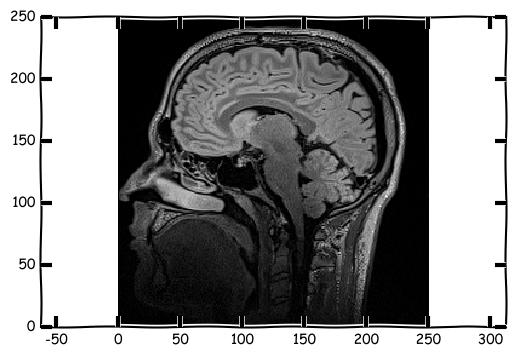

In [25]:
#and plotting
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 80]))

 It worked only cause the OS sorted the files correctly by itself. As I mentioned in the previous section, if the files weren’t properly named, lexicographical sorting would have given you a messed up array. 

# Learning Activity 4: Plot slice 60

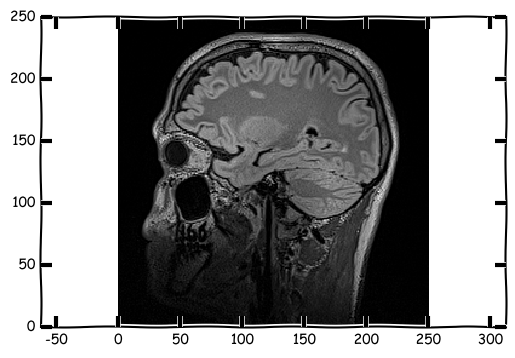

In [26]:
#and plotting
pyplot.figure(dpi=250)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 60]))

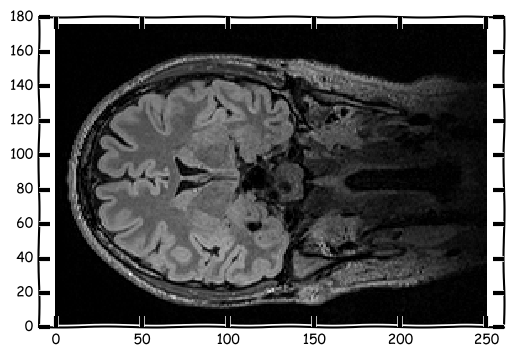

In [27]:
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, z, numpy.flipud(numpy.rot90(ArrayDicom[:, 115, :])))

# Reading DICOM through Simple ITK

Look at the following websites for further instructions:

http://nbviewer.jupyter.org/github/SimpleITK/SimpleITK-Notebooks/blob/master/01_Image_Basics.ipynb

https://itk.org/Wiki/SimpleITK/GettingStarted

https://itk.org/

# Imports

In [28]:
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper-Functions

plot a 2D SimpleITK image with a grayscale colormap and accompanying axes

In [29]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

# Options

In [30]:
# Directory where the DICOM files are being stored (in this
# case the 'Head' folder). 
pathDicom = 'N:\\PHDS8\\Head'

# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 50

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelWhiteMatter = 1
labelGrayMatter = 2

# DICOM Input

Load and read-in the DICOM files


In [31]:
reader = SimpleITK.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames(pathDicom)
reader.SetFileNames(filenamesDICOM)
imgOriginal = reader.Execute()

Limit image to a single 2D slice

In [32]:
imgOriginal = imgOriginal[:,:,idxSlice]

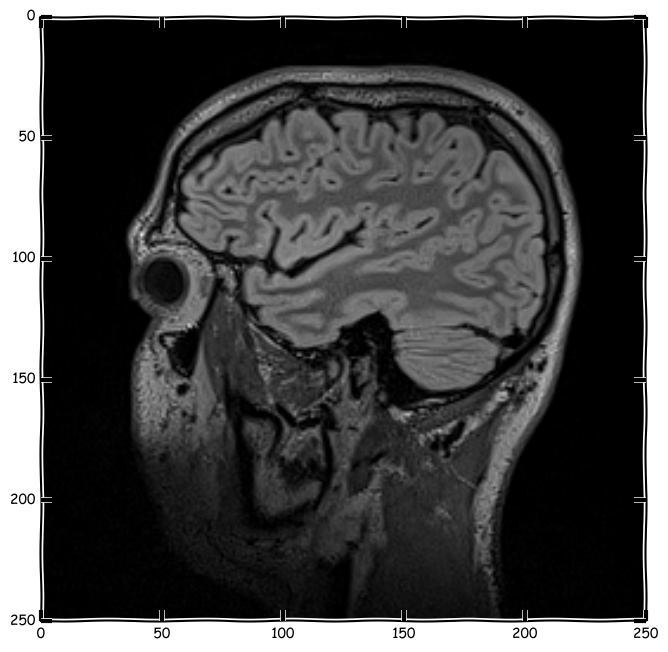

In [33]:
sitk_show(imgOriginal)

# Learning Activity 5: Load Chest-File with SimpleITK (use different variables)

In [34]:
# solution
pathChest = 'N:\\PHDS8\\Chest'
reader = SimpleITK.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames(pathChest)
reader.SetFileNames(filenamesDICOM)
imgChest = reader.Execute()

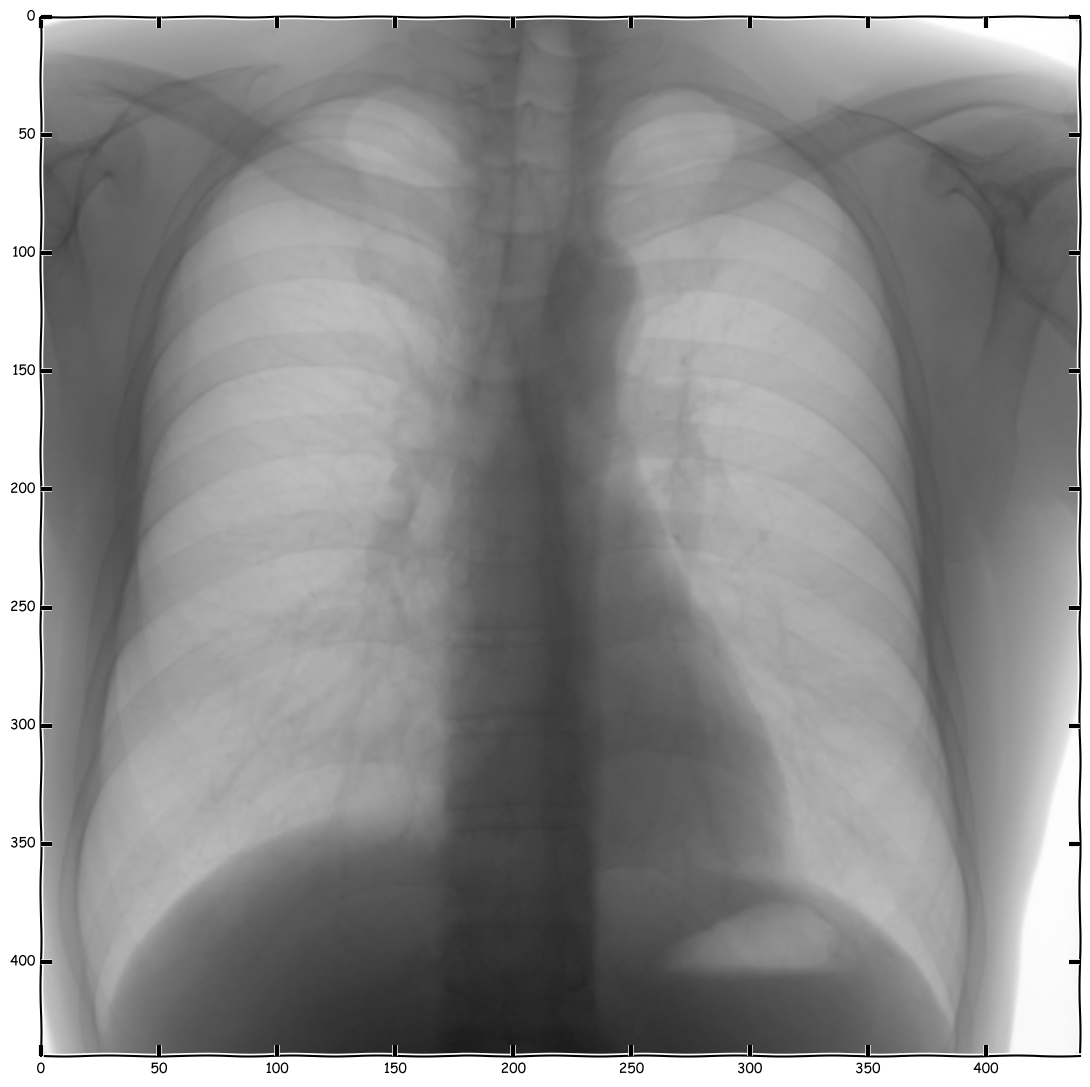

In [35]:
#only one slice, we know it
imgChest = imgChest[:,:,0]
sitk_show(imgChest)

# Smoothing

Apply a curvature-flow filter to smoothen the image (get rid of image noise)


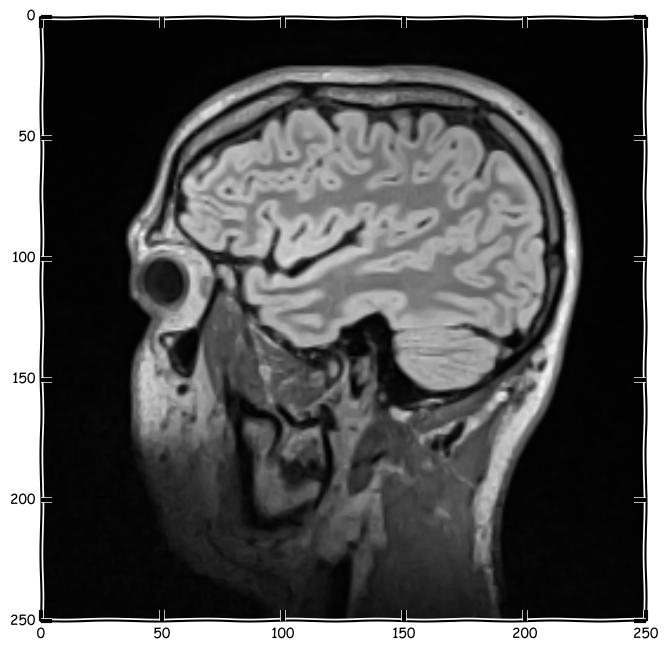

In [36]:
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)

# blurFilter = SimpleITK.CurvatureFlowImageFilter()
# blurFilter.SetNumberOfIterations(5)
# blurFilter.SetTimeStep(0.125)
# imgSmooth = blurFilter.Execute(imgOriginal)

sitk_show(imgSmooth)

# Learning Activity 6: Play with the filter

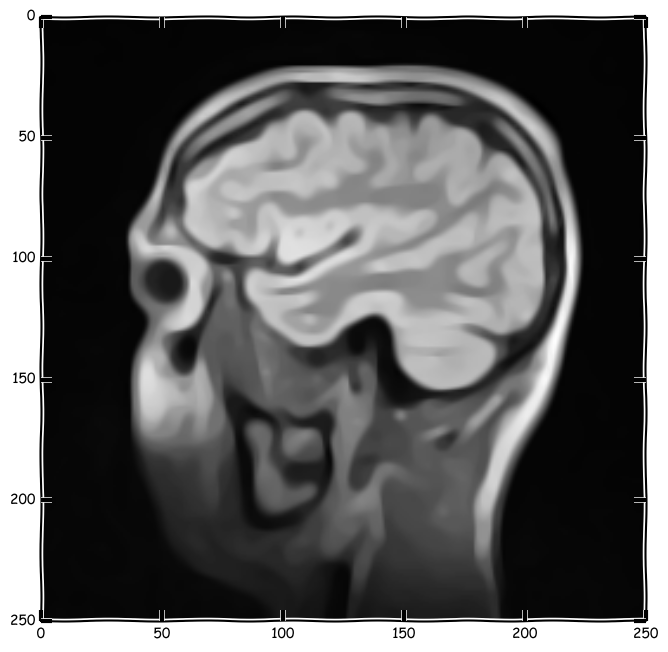

In [37]:
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=50)
sitk_show(imgSmooth)

# Segmentation with the ConnectedThreshold filter

Initial segmentation of white matter


In [38]:
lstSeeds = [(150,75)]

imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                              seedList=lstSeeds, 
                                              lower=130, 
                                              upper=190,
                                              replaceValue=labelWhiteMatter)

# Visualization with label overlay

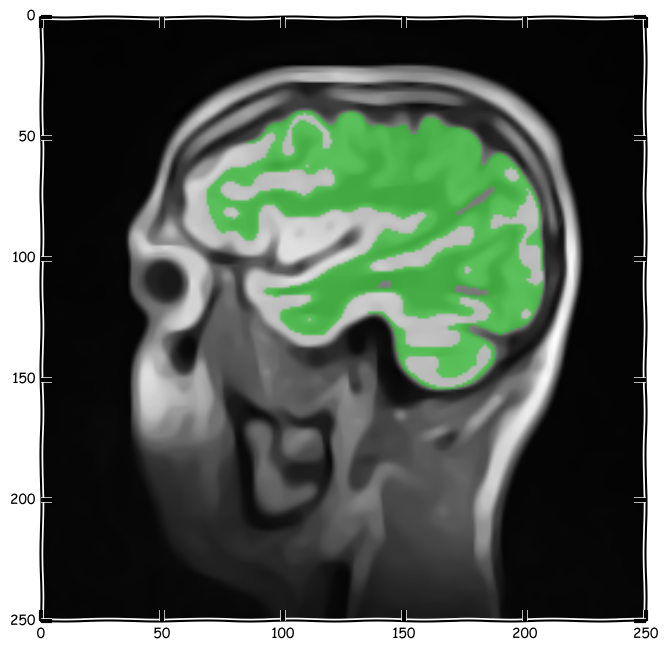

In [39]:
# Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

# Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatter))



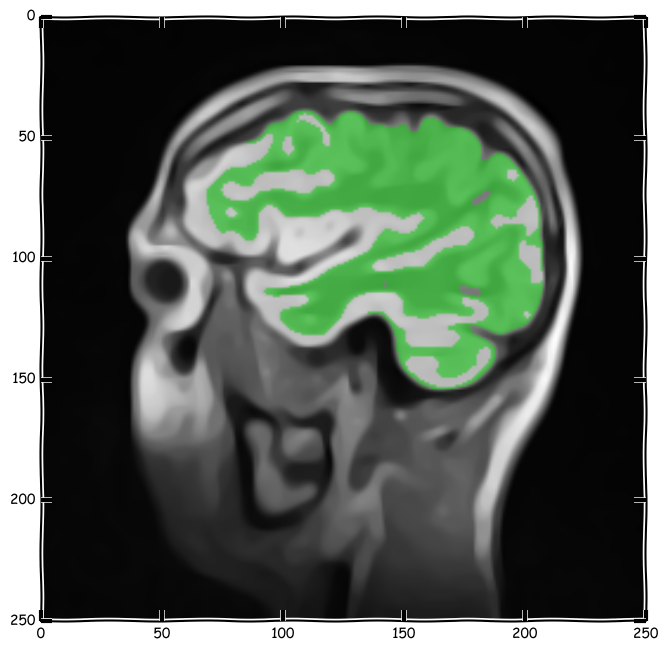

In [40]:
#Fill holes in the white matter
imgWhiteMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgWhiteMatter,
                                                          radius=[2]*3,
                                                          majorityThreshold=1,
                                                          backgroundValue=0,
                                                          foregroundValue=labelWhiteMatter)

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatterNoHoles))

## Segmentation & hole-filling of gray matter

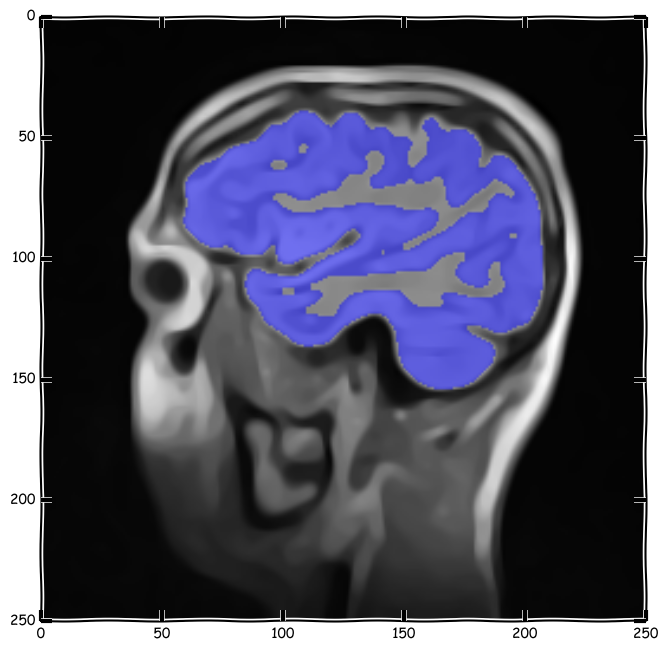

In [41]:
lstSeeds = [(119, 83), (198, 80), (185, 102), (164, 43)]

imgGrayMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                             seedList=lstSeeds, 
                                             lower=150, 
                                             upper=270,
                                             replaceValue=labelGrayMatter)

imgGrayMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgGrayMatter,
                                                         radius=[2]*3,
                                                         majorityThreshold=1,
                                                         backgroundValue=0,
                                                         foregroundValue=labelGrayMatter)

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgGrayMatterNoHoles))

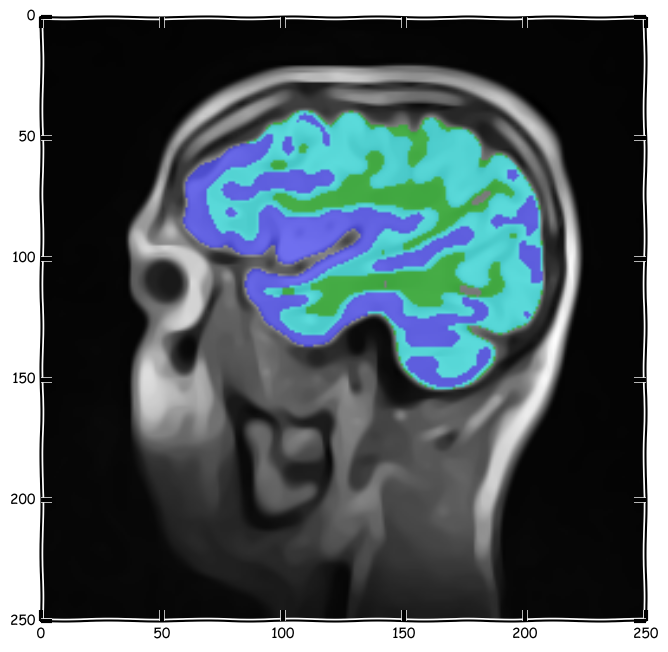

In [42]:
#Bitwire OR combination of the white matter and gray matter labels
imgLabels = imgWhiteMatterNoHoles | imgGrayMatterNoHoles


sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgLabels))

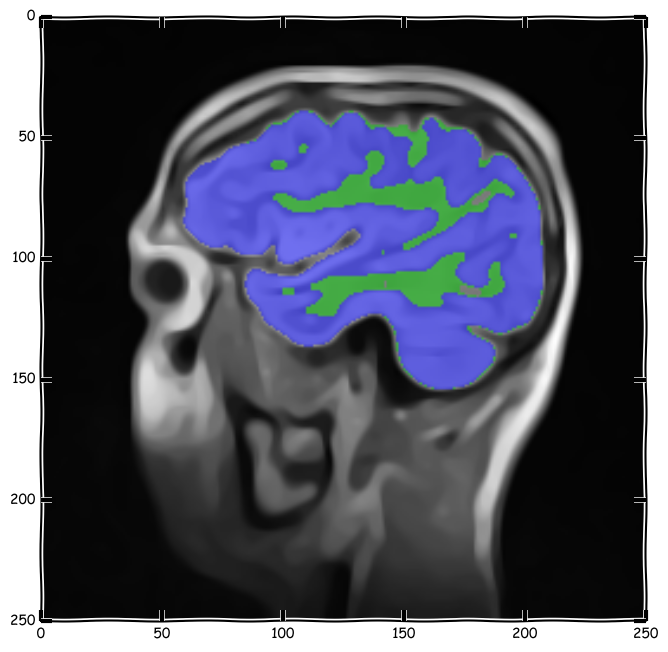

In [43]:
#Assignment of common areas to the gray matter
imgMask= imgWhiteMatterNoHoles/labelWhiteMatter * imgGrayMatterNoHoles/labelGrayMatter
imgWhiteMatterNoHoles -= imgMask*labelWhiteMatter

imgLabels = imgWhiteMatterNoHoles + imgGrayMatterNoHoles

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgLabels))

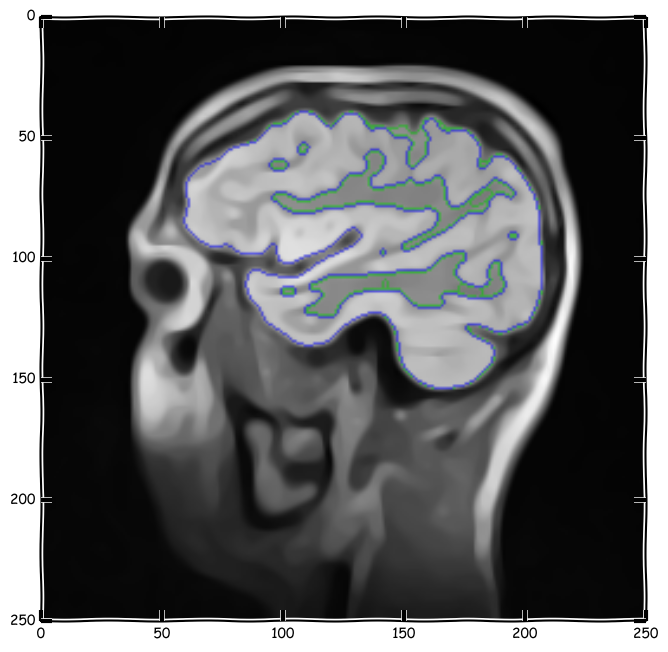

In [44]:
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, SimpleITK.LabelContour(imgLabels)))

Thank you for your contribution. Have a nice day!